In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

# Paste the path for Fake.csv inside the quotes below
df_fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')

# Paste the path for True.csv inside the quotes below
df_true = pd.read_csv('/content/drive/MyDrive/True.csv')

print("Success! Data Loaded.")
print("Fake Data Shape:", df_fake.shape)
print("True Data Shape:", df_true.shape)

Success! Data Loaded.
Fake Data Shape: (23481, 4)
True Data Shape: (21417, 4)


In [11]:
# Add labels: 0 for Fake, 1 for True
df_fake["class"] = 0
df_true["class"] = 1

# Merge both datasets into one
df_merge = pd.concat([df_fake, df_true], axis = 0)

# Drop unnecessary columns (we only need 'text' and 'class')
df = df_merge.drop(["title", "subject","date"], axis = 1)

# Shuffle the data (mix True and Fake news)
df = df.sample(frac = 1)

# Reset index to clean up the order
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

# Show the first 5 rows to check if it worked
print(df.head())

                                                text  class
0  Here s one sure way to turn a solidly  red  st...      0
1  Donald Trump just played coy and hinted that i...      0
2  SYDNEY (Reuters) - Three hundred U.S. Marines ...      1
3  LONDON (Reuters) - Britain s government has no...      1
4  PARIS (Reuters) - French President Emmanuel Ma...      1


In [12]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Apply the cleaning function to the 'text' column
df["text"] = df["text"].apply(wordopt)

print("Text cleaning completed successfully!")

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3289470041.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/tmp/ipython-input-3289470041.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/tmp/ipython-input-3289470041.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


Text cleaning completed successfully!


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
x = df["text"]
y = df["class"]

# Split data: 75% for training, 25% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Convert text to numbers using TF-IDF
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

print("Vectorization Complete!")

Vectorization Complete!


In [16]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

print("Model Training Complete!")

Model Training Complete!


In [17]:
pred_lr = LR.predict(xv_test)

print("Accuracy Score:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Accuracy Score: 0.9866369710467706
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5808
           1       0.98      0.99      0.99      5417

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [18]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("\n\nPrediction: {}".format(output_label(pred_LR[0])))

# This will ask you to enter news text
print("Enter the news text below to check:")
news = str(input())
manual_testing(news)

Enter the news text below to check:
"Breaking News: The President has signed a secret order to ban all internet access across the country starting tomorrow. NASA confirmed that the earth is actually flat and they have been lying to everyone for years."


Prediction: Fake News


In [19]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("\n\nPrediction: {}".format(output_label(pred_LR[0])))

# The input box will now appear with English text
news = str(input("Enter news text here: "))
manual_testing(news)

Enter news text here: "The U.S. House of Representatives passed a bill on Tuesday to increase funding for infrastructure projects across the country. The vote was held in Washington D.C. and aims to improve roads and bridges."


Prediction: Not A Fake News


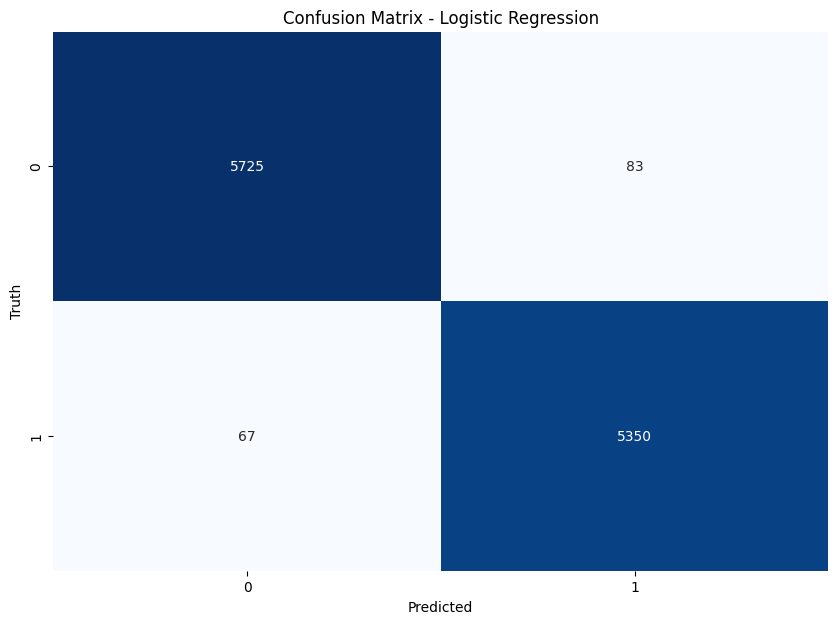

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, pred_lr)

# Plotting the heatmap for better visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Generating Word Cloud for Fake News...


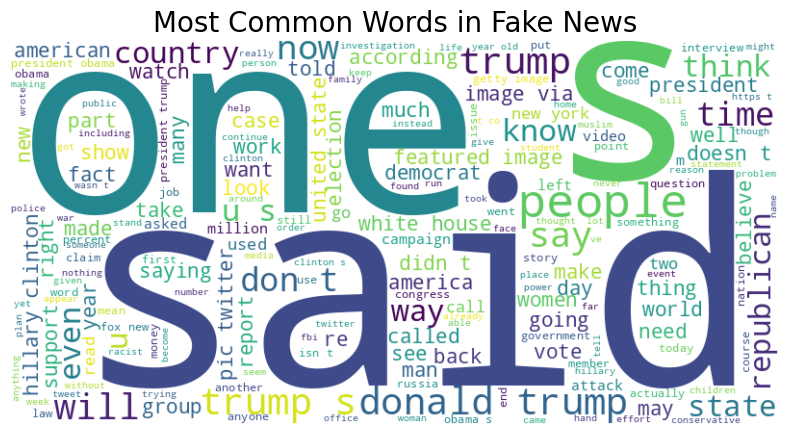

Generating Word Cloud for Real News...


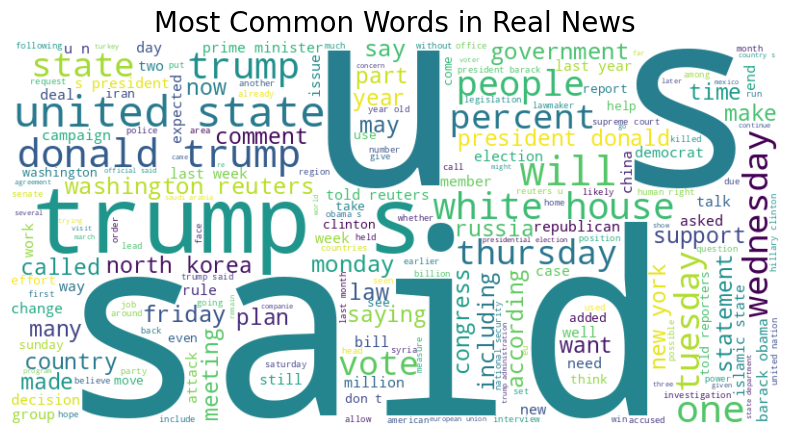

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and show Word Cloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Show Word Cloud for Fake News
print("Generating Word Cloud for Fake News...")
show_wordcloud(df[df['class'] == 0], "Most Common Words in Fake News")

# Show Word Cloud for Real News
print("Generating Word Cloud for Real News...")
show_wordcloud(df[df['class'] == 1], "Most Common Words in Real News")